**Brian Blaylock**  
*April 28, 2021*

# K-Index
One indicator of thunderstorm potential
https://github.com/Unidata/MetPy/issues/631
    
$$ K = (T_{850} - T_{500}) + Td_{850} - (T_{700} - Td_{700})$$

Where $T$ is temperature and $Td$ is dew point temperature at the level in hPa.

- K values +20 indicate some potential for air mass thunderstorms.
- K values +40 indicate almost 100% chance for air mass thunderstorms,
- with values over +30 to indicate potential MCC's.

Cool temperatures aloft and warm temperatures below are associated with instability at the surface (resulting in rising motion). Dry air aloft will lower the K value because when dry air entrains in a cumulus cloud it restricts it's thunderstorm growth.

In [7]:
from herbie.archive import Herbie
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from toolbox.cartopy_tools import common_features, pc

In [2]:
h = Herbie("2021-04-28 23:00").xarray("(TMP|DPT):(500|700|850) mb")

/p/home/blaylock/BB_python/Herbie/herbie/archive.py:286: UserWarning: `product` not specified. Will use ["sfc"].
  warnings.warn(f'`product` not specified. Will use ["{self.product}"].')


🏋🏻‍♂️ Found 2021-Apr-28 23:00 UTC F00 [HRRR] [product=sfc] GRIB2 file from aws and index file from aws.                                                                                                                                                       


/p/home/blaylock/BB_python/Herbie/herbie/archive.py:696: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


👨🏻‍🏭 Created directory: [/p/home/blaylock/data/hrrr/20210428]
📇 Download subset: [HRRR] model [sfc] product run at 2021-Apr-28 23:00 UTC F00                                                            
 cURL from https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr.20210428/conus/hrrr.t23z.wrfsfcf00.grib2
   1: GRIB_message=15  :TMP:500 mb:anl
   2: GRIB_message=16  :DPT:500 mb:anl
   3: GRIB_message=20  :TMP:700 mb:anl
   4: GRIB_message=21  :DPT:700 mb:anl
   5: GRIB_message=26  :TMP:850 mb:anl
   6: GRIB_message=27  :DPT:850 mb:anl


In [3]:
h

<xarray.Dataset>
Dimensions:              (isobaricInhPa: 3, y: 1059, x: 1799)
Coordinates:
    time                 datetime64[ns] 2021-04-28T23:00:00
    step                 timedelta64[ns] 00:00:00
  * isobaricInhPa        (isobaricInhPa) float64 850.0 700.0 500.0
    latitude             (y, x) float64 21.14 21.15 21.15 ... 47.86 47.85 47.84
    longitude            (y, x) float64 237.3 237.3 237.3 ... 299.0 299.0 299.1
    valid_time           datetime64[ns] 2021-04-28T23:00:00
Dimensions without coordinates: y, x
Data variables:
    t                    (isobaricInhPa, y, x) float32 281.0 281.0 ... 248.5
    dpt                  (isobaricInhPa, y, x) float32 276.0 275.9 ... 236.7
    gribfile_projection  object None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP 
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP 
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    remote_grib:             https://noaa-hrrr-bdp-pds.s3.amazonaws.com/hrrr....
    local_grib:              /p/home/blaylock/data/hrrr/20210428/hrrr.t23z.wr...
    searchString:            (TMP|DPT):(500|700|850) mb

In [4]:
T850 = h.t.sel(isobaricInhPa=850)
T500 = h.t.sel(isobaricInhPa=500)

D850 = h.dpt.sel(isobaricInhPa=850)

T700 = h.t.sel(isobaricInhPa=700)
D700 = h.dpt.sel(isobaricInhPa=700)

In [5]:
K = (T850 - T500) + D850 - (T700 - D700) - 273.15

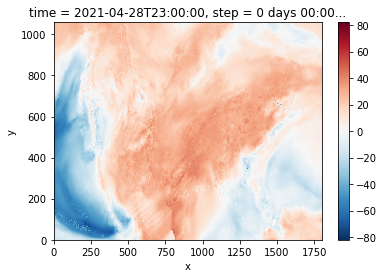

In [6]:
K.plot()

In [8]:
cmap = mcolors.LinearSegmentedColormap.from_list("k-index", ["w", "orange", "r"], 3)
cmap.set_over("k")
cmap.set_under("#3333ff10")
norm = mcolors.BoundaryNorm([0, 20, 30, 40], 3)

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/metpy/xarray.py:349: UserWarning: More than one time coordinate present for variable "gribfile_projection".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1797: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  result = matplotlib.axes.Axes.pcolormesh(self, *args, **kwargs)


Text(0.5, 1.0, 'HRRR')

/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:877: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/p/home/blaylock/anaconda3/envs/herbie/lib/python3.9/site-packages/cartopy/crs.py:944: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


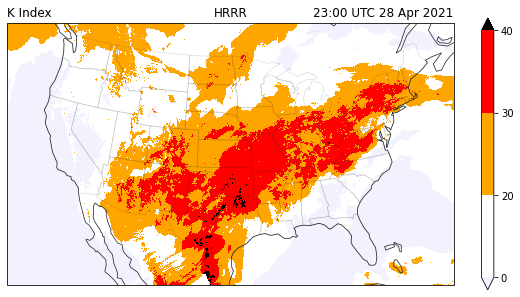

In [10]:
ax = common_features(crs=h.herbie.crs, figsize=[10, 5]).STATES().ax
K.plot(x="longitude", y="latitude", ax=ax, cmap=cmap, norm=norm, transform=pc)

str_date = K.valid_time.dt.strftime("%H:%M UTC %d %b %Y").item()
plt.title("K Index", loc="left")
plt.title(str_date, loc="right")
plt.title("HRRR", loc="center")